<a href="https://colab.research.google.com/github/joeldcosta/emoji-mosaic-mpl/blob/main/EmojiMosaic_%2B_AsciiArt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emoji Mosaic & Ascii Art using Python
# Download library First

In [1]:
#Get Emoji Library from Git 
!git clone "https://github.com/joeldcosta/emoji-mosaic-mpl.git"

Cloning into 'emoji-mosaic-mpl'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


# Download Mona Lisa Image
* use your own if you like & rename it.

In [2]:
#Download the Image
!wget "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/1200px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg" -O "Mona.jpg"

--2022-02-27 21:01:05--  https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/1200px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 853892 (834K) [image/jpeg]
Saving to: ‘Mona.jpg’

Mona.jpg            100%[===================>] 833.88K  --.-KB/s    in 0.09s   

2022-02-27 21:01:05 (9.14 MB/s) - ‘Mona.jpg’ saved [853892/853892]



# Convert Image to Ascii Art

In [3]:
# Image to Ascii Art
import string
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

#Image File
img_file = "Mona.jpg"

#open and resize 
# Change the size 
size = 60 #[HERE]
im = Image.open(img_file).resize([size, size])

#convert to greyscale
im2 = im.convert(mode = 'L')

#convert image to array (flattened) --> reshape 
im4 = np.array(im2.getdata()).reshape([size, size])
print('Image loaded...')

#ASCII directory
#Variation 1
asci =  r"QG@#$%?*+^)/;:!,'.` " 

#Variation 2
#asci = r"B8&WM#YXQO{}[]()I1i!pao;:,.    "

#get the proportion of 256 and replace with an ASCII charecter.
im7 = []
for i in range(size):
    imtemp = ""
    for j in range(size):
        imtemp+= asci[(len(asci)-1)*im4[i,j]//256]
    im7.append(imtemp)
print('Image Converted...')
    
#Ascii Saved in a text file    
with open('Mona_ascii.txt', 'w') as text:
    for i in im7:
        text.write(i)
        text.write('\n')

print('Image written to .txt file.')
example1 = "/content/Mona_ascii.txt"
file1 = open(example1, "r")
print(file1.read())

Image loaded...
Image Converted...
Image written to .txt file.
***************??**********************???????????????*???*?
++++++++++++++++**++++++++++++++++++++++*****+****+++++++++*
++++++++++++++++*++++++++++++++++++++++++++++++++++++++++^++
+^^+^^+++^^+++++++++++++++^^^^^^++++++^^^++++++++^^^^^^^^^^+
^^^^^^^^^^^^^^^^^^^^^^^++^^^^^)^^^^^^^^^^^^^^^^^^^^^^^^^^^^+
^)^^^^^^^^^^^^^^^^^^^^^^^^^+****++^^^^^^^^^^^^^^^^^^))^^^))^
^)^)))^^)^^^^)))))))))))+?%%$##@##$?+)^)^^^^^^^)^))))))))))^
^)))))))))))))))))))))^?%%*?%$$#@@@G@*))))^^^)))))))))))))))
^))/))/))))))//))))//)??^)/)^+?$#@GGGG?))))))))))/))))))))/)
^)))))//////////////)?*/:!!!:;)*$#@GGGG*/)))/////////))))//)
^///)////;//////////*#^;:::!:;)+?$@@GGG@^))))///////////)//)
+))))^//;;/;;//;//;^$$);:::::;/)^*$@GGGQ%+++^)))////////)//)
?++*++^)))^))/;;;;/?#%//;::;))))^*$@GGGG#??*++^+)///;;/))))+
$???++++*+**++/;;;^%#$*+*);**+?%%?%@@GGG@%%?****+/;;;;/))^)+
$%****+***??**))+^^$@%))^//+)/^^)^%@@GGG@%%%????*);;///)^^)^
%???***?????%%?????$@%

# Convert Text file To Image

Could not load font "DejaVuSansMono.ttf".
Could not load font "Consolas Mono.ttf".
Could not load font "Consola.ttf".
Using default font.
Your File name is  Mona_text_img.png [Save / Download]


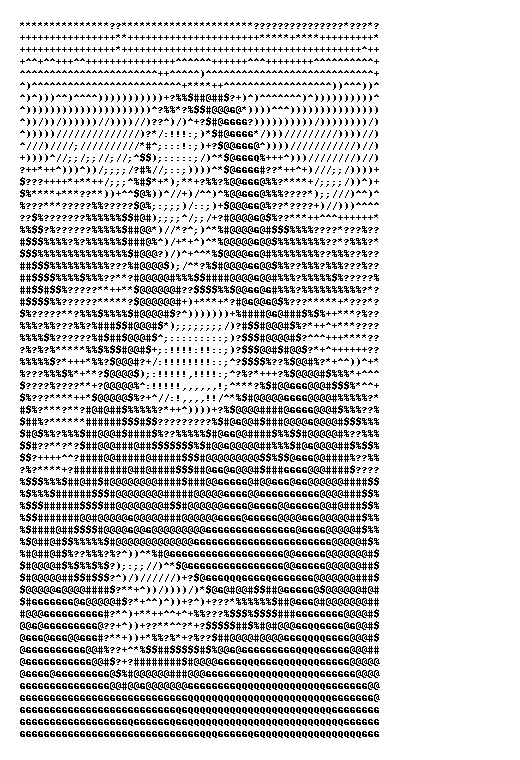

In [4]:
from math import ceil

from PIL import (
    Image,
    ImageFont,
    ImageDraw,
)

PIL_GRAYSCALE = 'L'
PIL_WIDTH_INDEX = 0
PIL_HEIGHT_INDEX = 1
COMMON_MONO_FONT_FILENAMES = [
    'DejaVuSansMono.ttf',  # Linux
    'Consolas Mono.ttf',   # MacOS, I think
    'Consola.ttf',         # Windows, I think
]

in_put = "/content/Mona_ascii.txt"
out_put = "Mona_text_img.png"

def main():
    image = textfile_to_image(in_put)
    image.show()
    image.save(out_put)

def textfile_to_image(textfile_path):
    """Convert text file to a grayscale image.

    arguments:
    textfile_path - the content of this file will be converted to an image
    font_path - path to a font file (for example impact.ttf)
    """
    # parse the file into lines stripped of whitespace on the right side
    with open(textfile_path) as f:
        lines = tuple(line.rstrip() for line in f.readlines())

    # choose a font (you can see more detail in the linked library on github)
    font = None
    large_font = 20  # get better resolution with larger size
    for font_filename in COMMON_MONO_FONT_FILENAMES:
        try:
            font = ImageFont.truetype(font_filename, size=large_font)
            print(f'Using font "{font_filename}".')
            break
        except IOError:
            print(f'Could not load font "{font_filename}".')
    if font is None:
        font = ImageFont.load_default()
        print('Using default font.')

    # make a sufficiently sized background image based on the combination of font and lines
    font_points_to_pixels = lambda pt: round(pt * 96.0 / 72)
    margin_pixels = 20

    # height of the background image
    tallest_line = max(lines, key=lambda line: font.getsize(line)[PIL_HEIGHT_INDEX])
    max_line_height = font_points_to_pixels(font.getsize(tallest_line)[PIL_HEIGHT_INDEX])
    realistic_line_height = max_line_height * 0.8  # apparently it measures a lot of space above visible content
    image_height = int(ceil(realistic_line_height * len(lines) + 2 * margin_pixels))

    # width of the background image
    widest_line = max(lines, key=lambda s: font.getsize(s)[PIL_WIDTH_INDEX])
    max_line_width = font_points_to_pixels(font.getsize(widest_line)[PIL_WIDTH_INDEX])
    image_width = int(ceil(max_line_width + (2 * margin_pixels)))

    # draw the background
    background_color = 255  # white
    image = Image.new(PIL_GRAYSCALE, (image_width, image_height), color=background_color)
    draw = ImageDraw.Draw(image)

    # draw each line of text
    font_color = 0  # black
    horizontal_position = margin_pixels
    for i, line in enumerate(lines):
        vertical_position = int(round(margin_pixels + (i * realistic_line_height)))
        draw.text((horizontal_position, vertical_position), line, fill=font_color, font=font)

    return image

if __name__ == '__main__':
    main()
print("Your File name is ",out_put, "[Save / Download]")
from IPython.display import Image
Image(out_put)

# Convert Image to Emoji Mosaic Art

Your NFT is Saved & Ready to Use
Your NFT File Name is :  NFT_1.png


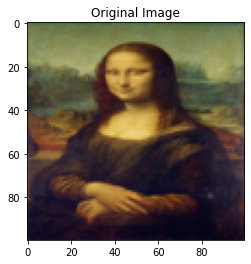

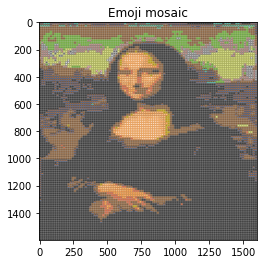

In [6]:
#imports 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mim
import matplotlib.pyplot as plt
from scipy import spatial
from matplotlib import cm
from PIL import Image

#Image File
img_file = "Mona.jpg"

#emoji directory###################################################
# Note:- Using Emoji_16.npy (Variation 1)

## Uncomment this two lines or...
emoji_array = np.load("/content/emoji-mosaic-mpl/emojis_16.npy")
size = 100

# Note:- Using Emoji_matches.npy (Variation 2)

## Uncomment this two lines!!!
#emoji_array = np.load("/content/emoji-mosaic-mpl/emoji_matches.npy")
#size = 100

# Change size according to your convinence 16, 100, 200, 500... etc etc
###################################################################

#get mean of each emoji
emoji_mean_array = np.array([ar.mean(axis=(0,1)) for ar in emoji_array]) 

#store them in a tree  to search faster 
tree = spatial.KDTree(emoji_mean_array)

#--> open  
#--> resize, smaller  
#--> convert to an array
#--> reshape to a 3d array 
#--> normalize the pixel values
G_sm = np.array(Image.open(img_file).resize([size,size]).getdata()).reshape([size,size,3])/256

plt.figure()
plt.imshow(G_sm)
plt.title('Original Image')

indices = []

#flatten the array
flattened_img = G_sm.reshape(-1, G_sm.shape[-1]) 

#match the pixels with the  closest resembling emoji
#tree.query() finds the nearest neighbour index
for pixel in flattened_img:
    pixel_ = np.concatenate((pixel, [1]))
    _, index=tree.query(pixel_)
    indices.append(index)

#from index get the corresponding emoji (flattened)
emoji_matches = emoji_array[indices] 

#reshape it to form the image. each emoji has the shape (16, 16, 4)
#note: 4 --> R, G, B, alpha
dim = G_sm.shape[0] 
resized_ar = emoji_matches.reshape((dim, dim, 16, 16, 4 ))

#converts individual emoji patches (5 dimensional)
#into a complete image (3 dimensional) using numpy blocks
final_img = np.block([[[x] for x in row] for row in resized_ar]) 

#Plot Image with Data
plt.figure()
plt.imshow(final_img)
plt.title('Emoji mosaic')
plt.savefig('plot_emojied.png')

# NFT Image
nft = 'NFT_1.png'
plt.imsave(nft,final_img)
print("Your NFT is Saved & Ready to Use")
print("Your NFT File Name is : ", nft)

# Delete Unwanted Directory
* comment which you want to keep

In [ ]:
#Remove Directory
!rm -rd "sample_data"
#!rm -rf "emoji-mosaic-mpl"
print("Removed (Pls Refresh Files to see the Effect)")